In [ ]:
from Validation import Differ
# uses matplotlib so define the default theme to be mplhep
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.ROOT)

In [2]:
fd = Differ('v3.2.0-gamma\n7-gf693fd4\n10k Plain',
            ('data/v3.2.0-gamma-7-gf693fd4/events_sim_plain_geometry_v12_events_10000_run_1.root','v12'),
            ('data/v3.2.0-gamma-7-gf693fd4/events_sim_plain_geometry_v14_events_10000_run_1.root','v14'))

In [3]:
def rename_columns_and_calc_layer(data) :
    data.rename(inplace=True,columns=lambda cn : cn.replace('EcalSimHits_valid.','').replace('_',''))
    data['layer'] = (data['id'].values >> 17) & 0x3f
fd.load(manipulation = rename_columns_and_calc_layer, filter_name = 'EcalSimHits_valid/*')

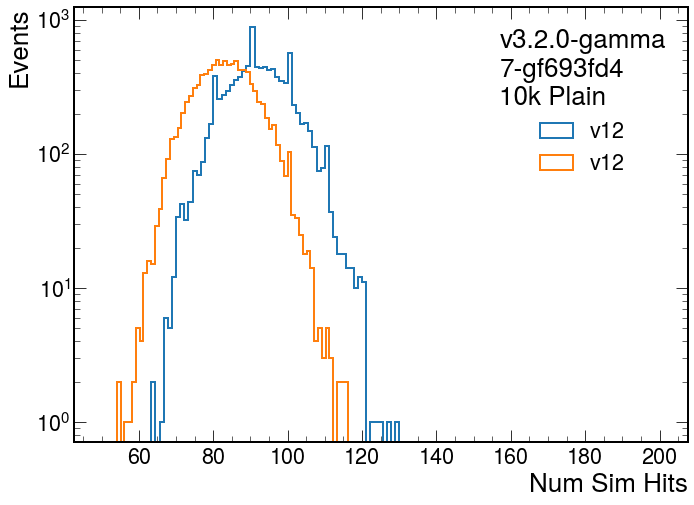

In [4]:
def count_sim_hits(data) :
    return data.reset_index(level=1).index.value_counts()
fd.plot1d(count_sim_hits, 'Num Sim Hits', ylabel='Events', bins='auto', range=(50, 200))

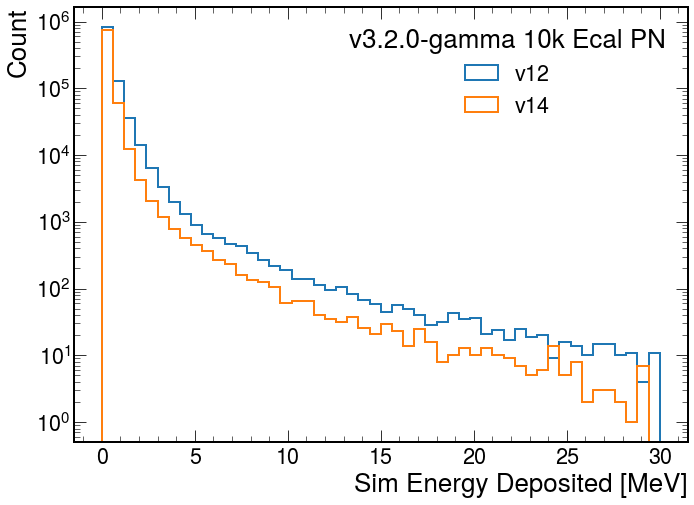

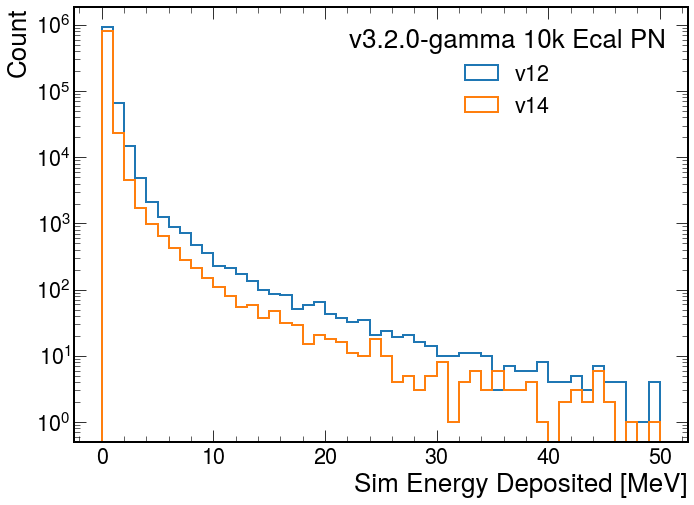

In [5]:
fd.plot1d('edep', 'Sim Energy Deposited [MeV]', bins=50, range=(0.,50.))

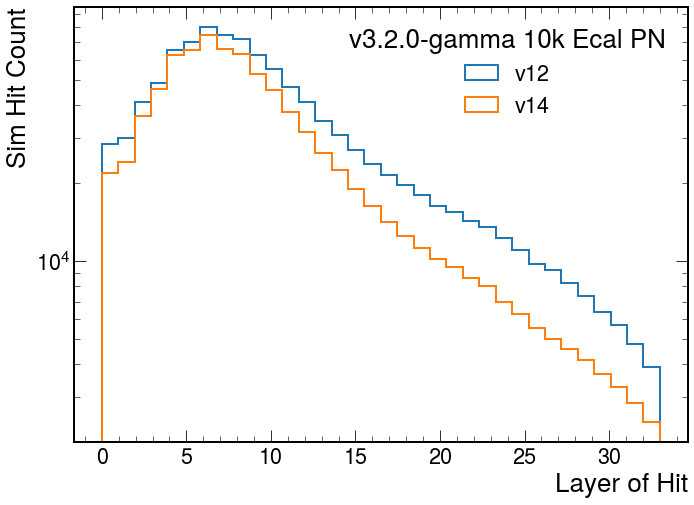

In [14]:
fd.plot1d('layer', 'Layer of Hit', ylabel='Sim Hit Count', bins=34)

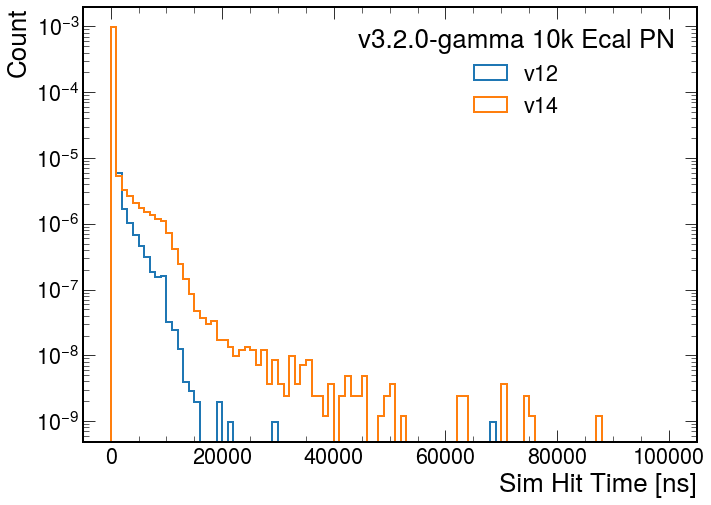

In [4]:
fd.plot1d('time', 'Sim Hit Time [ns]', range=(0,100000), bins=100, density=True)

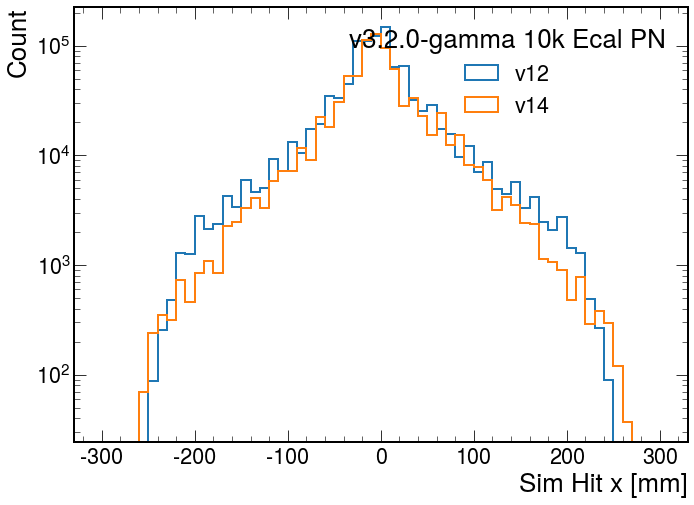

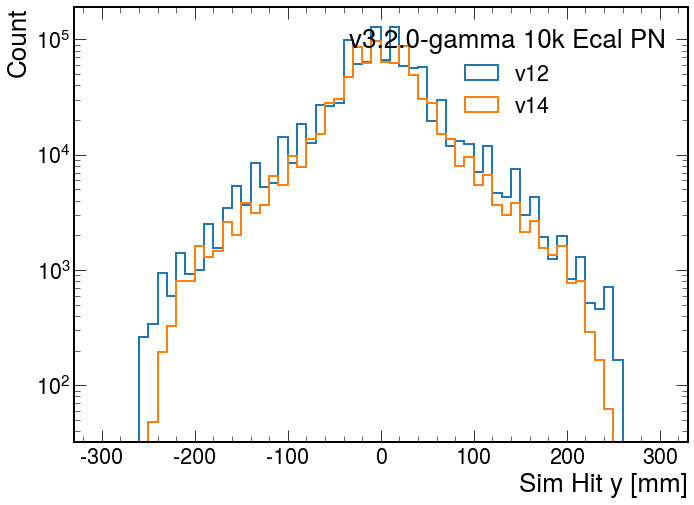

In [12]:
fd.plot1d('x', 'Sim Hit x [mm]', range=(-300,300), bins=60)
fd.plot1d('y', 'Sim Hit y [mm]', range=(-300,300), bins=60)

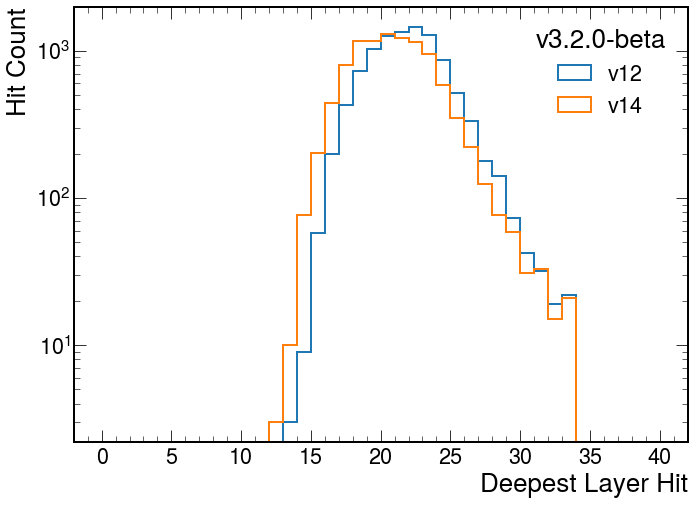

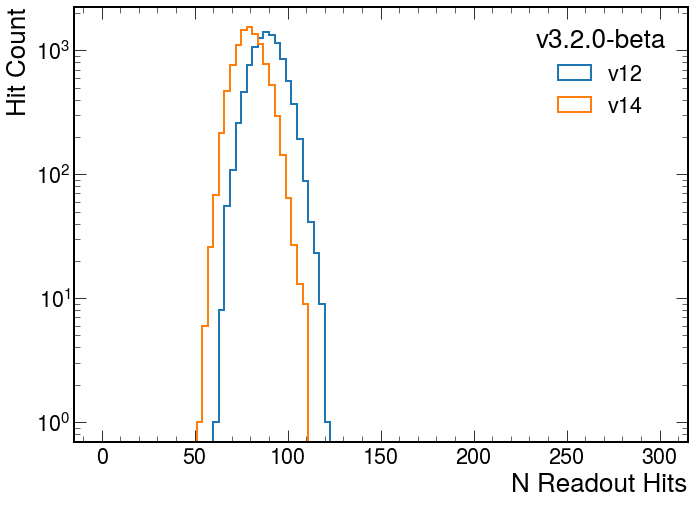

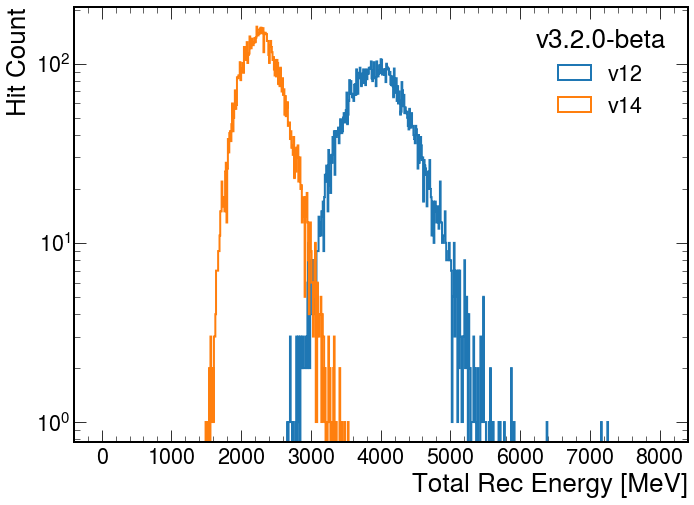

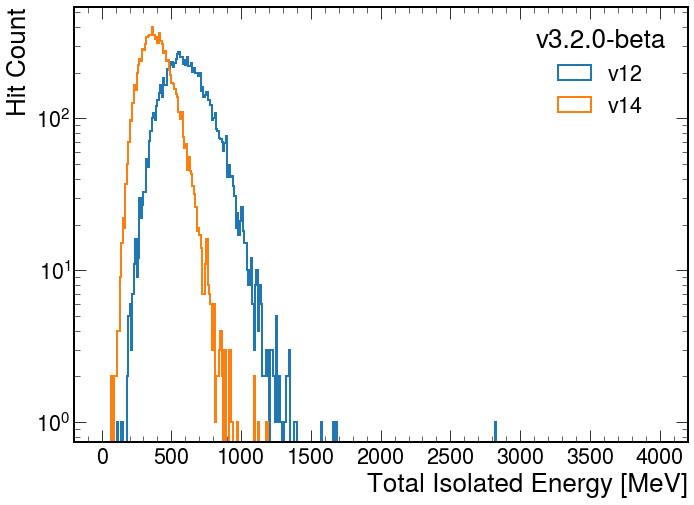

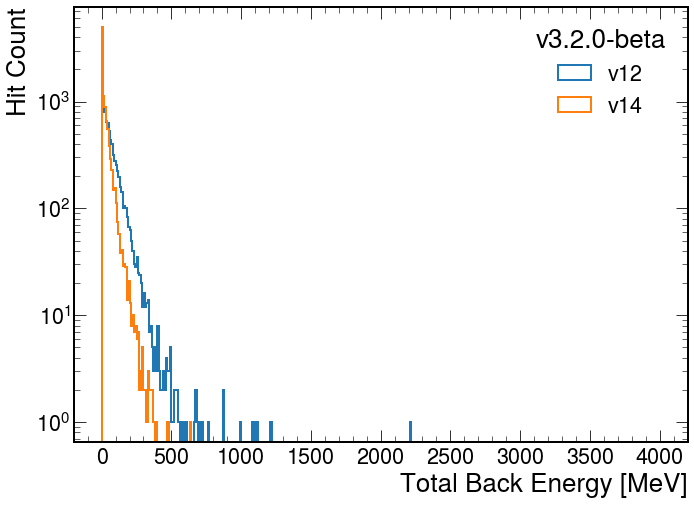

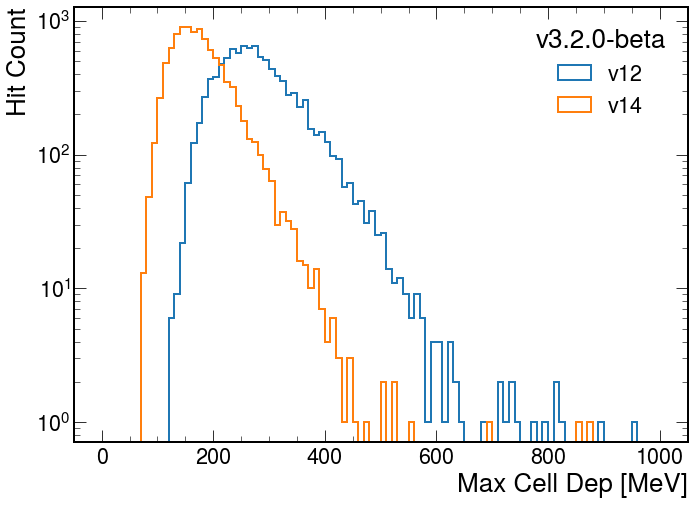

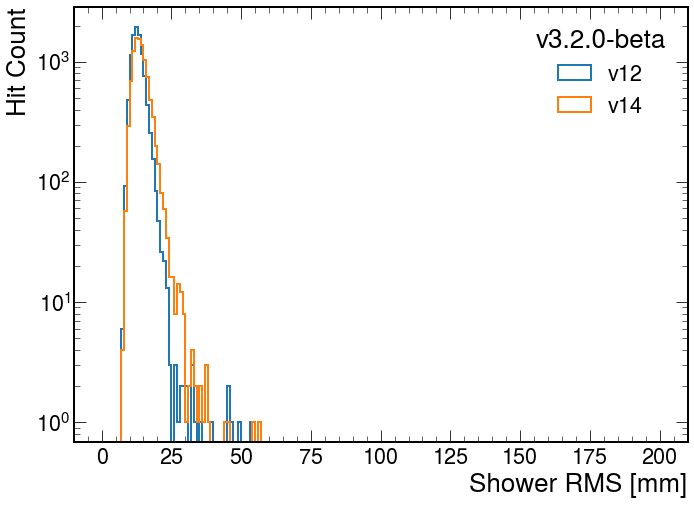

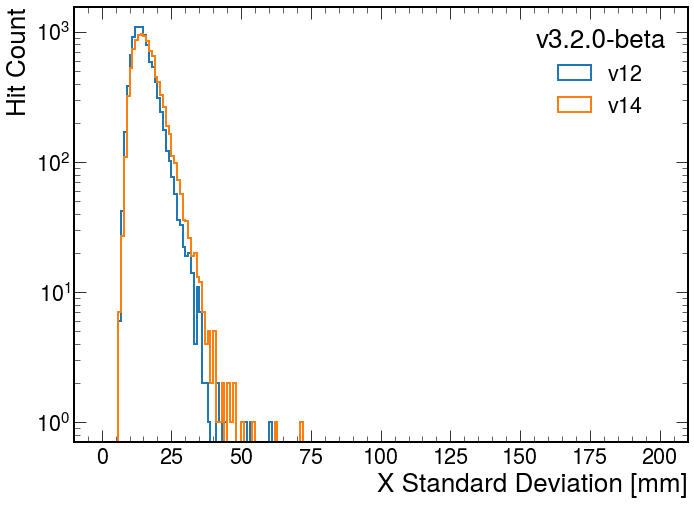

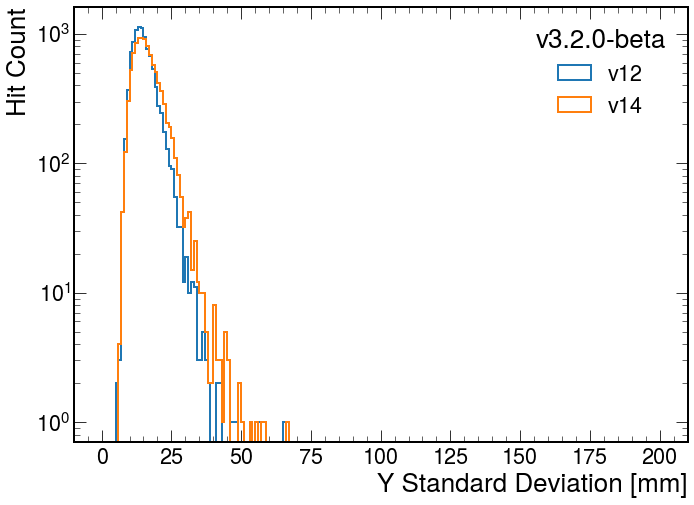

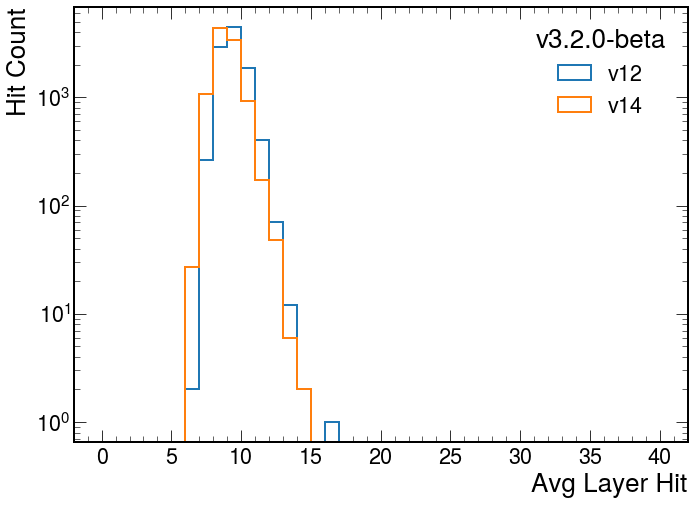

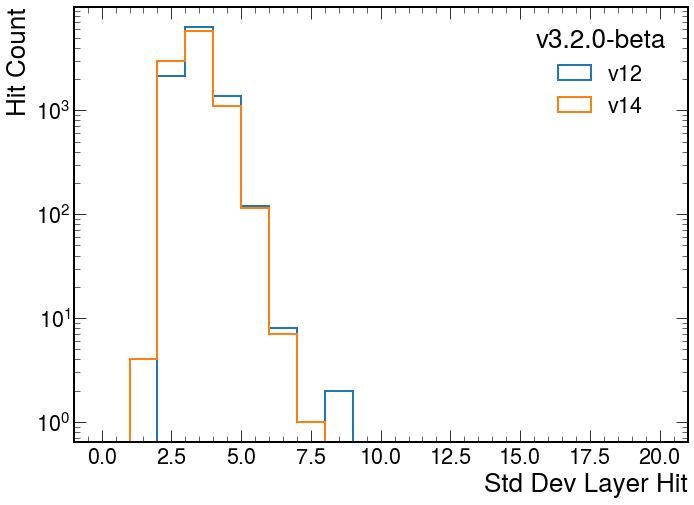

In [5]:
shower_feats = [
    ('EcalShowerFeatures/EcalShowerFeatures_deepest_layer_hit', 'Deepest Layer Hit'),
    ('EcalShowerFeatures/EcalShowerFeatures_num_readout_hits', 'N Readout Hits'),
    ('EcalShowerFeatures/EcalShowerFeatures_summed_det', 'Total Rec Energy [MeV]'),
    ('EcalShowerFeatures/EcalShowerFeatures_summed_iso', 'Total Isolated Energy [MeV]'),
    ('EcalShowerFeatures/EcalShowerFeatures_summed_back', 'Total Back Energy [MeV]'),
    ('EcalShowerFeatures/EcalShowerFeatures_max_cell_dep', 'Max Cell Dep [MeV]'),
    ('EcalShowerFeatures/EcalShowerFeatures_shower_rms', 'Shower RMS [mm]'),
    ('EcalShowerFeatures/EcalShowerFeatures_x_std', 'X Standard Deviation [mm]'),
    ('EcalShowerFeatures/EcalShowerFeatures_y_std', 'Y Standard Deviation [mm]'),
    ('EcalShowerFeatures/EcalShowerFeatures_avg_layer_hit', 'Avg Layer Hit'),
    ('EcalShowerFeatures/EcalShowerFeatures_std_layer_hit', 'Std Dev Layer Hit')
]
for path, name in shower_feats :
    hd.plot1d(path, name)

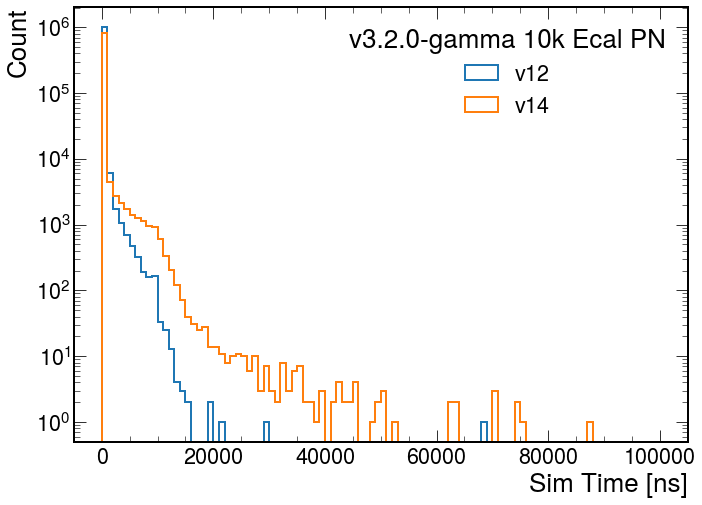

In [15]:
fd.plot1d('LDMX_Events/EcalSimHits_valid/EcalSimHits_valid.time_',
          'Sim Time [ns]',
          range=(0,100000),bins=100)

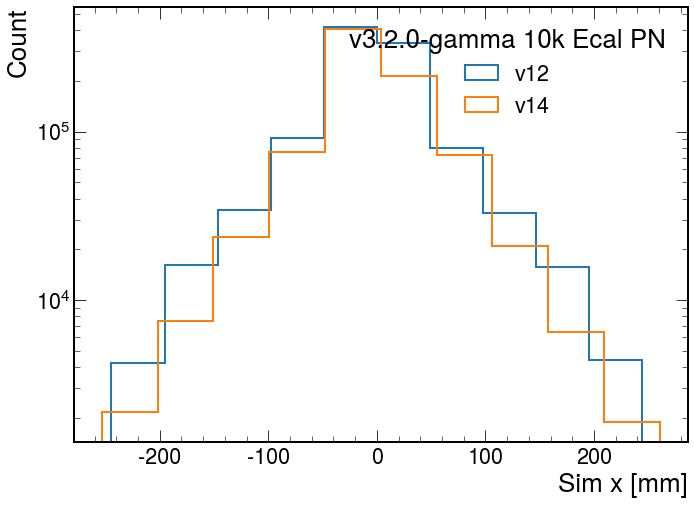

In [14]:
fd.plot1d('LDMX_Events/EcalSimHits_valid/EcalSimHits_valid.x_',
          'Sim x [mm]')

In [37]:
with uproot.open('data/v3.2.0-gamma-7-g7a16748/events_sim_ecalpn_geometry_v14_events_10000_run_1.root:LDMX_Events') as t :
    df = t['EcalSimHits_valid'].arrays(library='pd').rename(columns=lambda cn : cn.replace('EcalSimHits_valid.','').replace('_',''))
    df['layer'] = (df['id'].values >> 17) & 0x3f

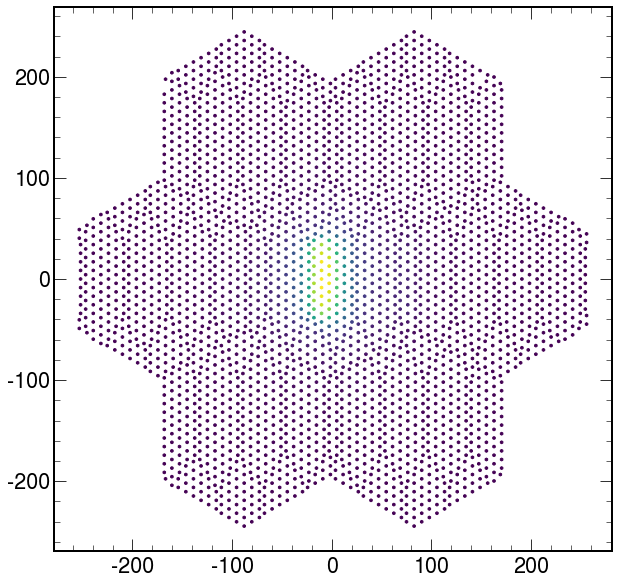

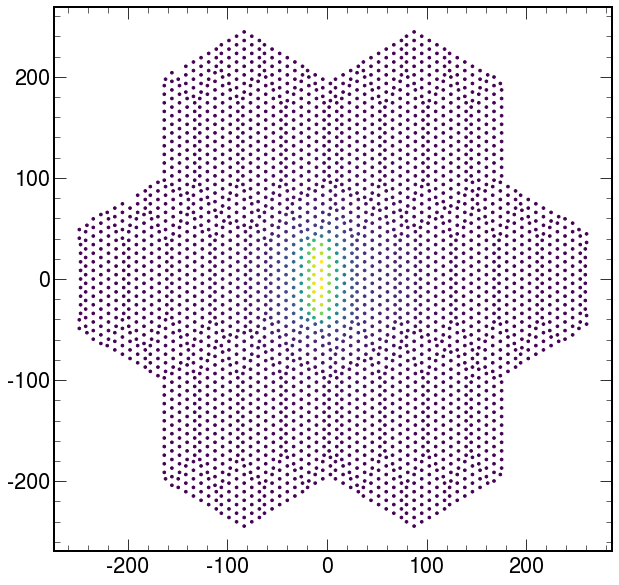

In [40]:
for p in (0,1) :
    sl = df[df['layer'] % 2 == p]
    plt.hexbin(sl['x'],sl['y'],gridsize=200,mincnt=1)
    plt.show()

In [ ]:
numpy